In [1]:
import pandas as pd
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
import math
tqdm.pandas()

In [3]:
road = 2
direction = "out"
df = pd.read_csv(
    f'../dataset/2020-02-road-{road}-{direction}.csv', parse_dates=["datetime"])
# df = df.drop(['all_units','samecell_units','max_speed','avg_traveltime','max_traveltime'],axis=1)
df = df[df["avg_speed"] <= 80]
df


,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime
0,2020-02-01 00:00:34,2,1,out,0,0,5,0,0,0,0,0
1,2020-02-01 00:00:34,2,2,out,0,0,5,0,0,0,0,0
2,2020-02-01 00:00:34,2,3,out,7,5,3,2,62,74,57,64
3,2020-02-01 00:00:34,2,4,out,4,4,0,0,71,84,64,73
4,2020-02-01 00:00:34,2,6,out,1,0,6,1,36,36,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17060349,2020-02-29 23:59:14,2,479,out,1,1,0,0,58,58,60,60
17060350,2020-02-29 23:59:14,2,488,out,0,0,1,0,0,0,0,0
17060351,2020-02-29 23:59:14,2,489,out,1,1,1,0,56,56,59,59
17060352,2020-02-29 23:59:14,2,490,out,2,2,1,0,64,78,54,60


In [4]:
df['inflow_units_N'] = (df["inflow_units"] - df["inflow_units"].min()) / (df["inflow_units"].max() - df["inflow_units"].min())
df['outflow_units_N'] = (df["outflow_unit"] - df["outflow_unit"].min()) / (df["outflow_unit"].max() - df["outflow_unit"].min())
df['avg_speed_N'] = (df["avg_speed"] - df["avg_speed"].min()) / (df["avg_speed"].max() - df["avg_speed"].min())
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N
0,2020-02-01 00:00:34,2,1,out,0,0,5,0,0,0,0,0,0.000000,0.185185,0.0000
1,2020-02-01 00:00:34,2,2,out,0,0,5,0,0,0,0,0,0.000000,0.185185,0.0000
2,2020-02-01 00:00:34,2,3,out,7,5,3,2,62,74,57,64,0.208333,0.111111,0.7750
3,2020-02-01 00:00:34,2,4,out,4,4,0,0,71,84,64,73,0.166667,0.000000,0.8875
4,2020-02-01 00:00:34,2,6,out,1,0,6,1,36,36,0,0,0.000000,0.222222,0.4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17060349,2020-02-29 23:59:14,2,479,out,1,1,0,0,58,58,60,60,0.041667,0.000000,0.7250
17060350,2020-02-29 23:59:14,2,488,out,0,0,1,0,0,0,0,0,0.000000,0.037037,0.0000
17060351,2020-02-29 23:59:14,2,489,out,1,1,1,0,56,56,59,59,0.041667,0.037037,0.7000
17060352,2020-02-29 23:59:14,2,490,out,2,2,1,0,64,78,54,60,0.083333,0.037037,0.8000


In [5]:
# sns.pairplot(df,vars=['inflow_units_N','outflow_units_N','avg_speed_N'],hue="cluster")

In [6]:
# fig = px.scatter_matrix(df.drop(["datetime","road_number","km","direction","inflow_units","outflow_unit","avg_speed"],axis=1),width=600, height=1000)
# fig.show()

In [7]:
df.max(axis=0)

datetime           2020-02-29 23:59:14
road_number                          2
km                                 508
direction                          out
all_units                           71
inflow_units                        24
outflow_unit                        27
samecell_units                      61
avg_speed                           80
max_speed                          213
avg_traveltime                     998
max_traveltime                     998
inflow_units_N                     1.0
outflow_units_N                    1.0
avg_speed_N                        1.0
dtype: object

In [8]:
X = df[['inflow_units_N','outflow_units_N','avg_speed_N']].values
X

array([[0.        , 0.18518519, 0.        ],
       [0.        , 0.18518519, 0.        ],
       [0.20833333, 0.11111111, 0.775     ],
       ...,
       [0.04166667, 0.03703704, 0.7       ],
       [0.08333333, 0.03703704, 0.8       ],
       [0.        , 0.        , 0.6125    ]])

In [9]:
# WCSS = []
# for i in range(1,11):
#     model = KMeans(n_clusters = i,init = 'k-means++')
#     model.fit(X)
#     WCSS.append(model.inertia_)
# fig = plt.figure(figsize = (7,7))
# plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'blue')
# plt.xticks(np.arange(11))
# plt.xlabel("Number of clusters")
# plt.ylabel("WCSS")
# plt.show()

In [10]:
model = KMeans(n_clusters = 5,init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X)
df['cluster'] = y_clusters
y_clusters

array([1, 1, 2, ..., 0, 4, 0])

C:\Users\NITIKORN\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

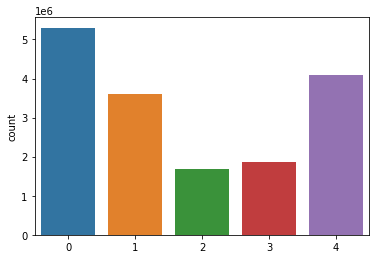

In [11]:
sns.countplot(y_clusters)

In [12]:
print(X[y_clusters == 0,0][0])
print(X[y_clusters == 0,1][0])
print(X[y_clusters == 0,2][0])

0.125
0.037037037037037035
0.6375


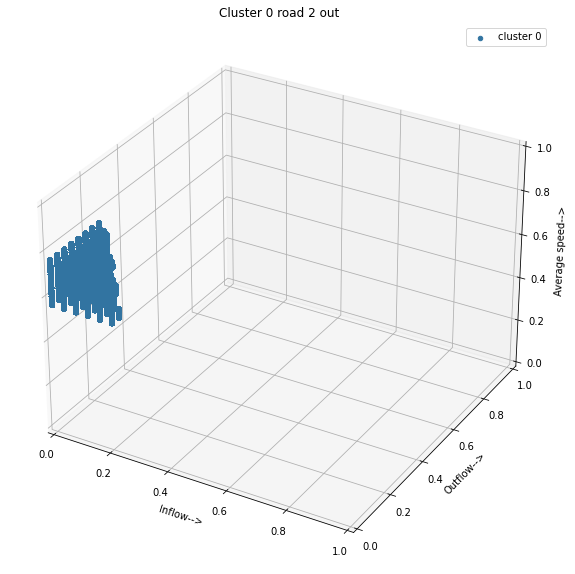

In [13]:
fig1 = plt.figure(figsize = (10,10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 20 , color = '#3274A1', label = "cluster 0")
ax1.set_xlim3d(0,1)
ax1.set_ylim3d(0,1)
ax1.set_zlim3d(0,1)
ax1.set_xlabel('Inflow-->')
ax1.set_ylabel('Outflow-->')
ax1.set_zlabel('Average speed-->')
ax1.set_title(f"Cluster 0 road {road} {direction}")
ax1.legend()
plt.show()

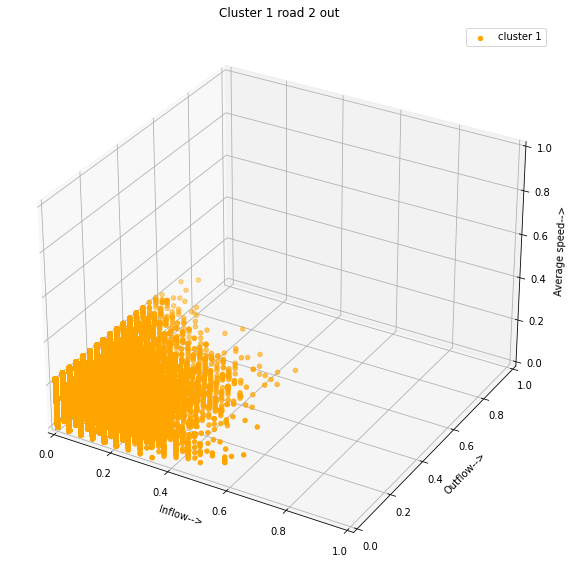

In [14]:
fig2 = plt.figure(figsize = (10,10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 20 , color = 'orange', label = "cluster 1")
ax2.set_xlim3d(0,1)
ax2.set_ylim3d(0,1)
ax2.set_zlim3d(0,1)
ax2.set_xlabel('Inflow-->')
ax2.set_ylabel('Outflow-->')
ax2.set_zlabel('Average speed-->')
ax2.set_title(f"Cluster 1 road {road} {direction}")
ax2.legend()
plt.show()

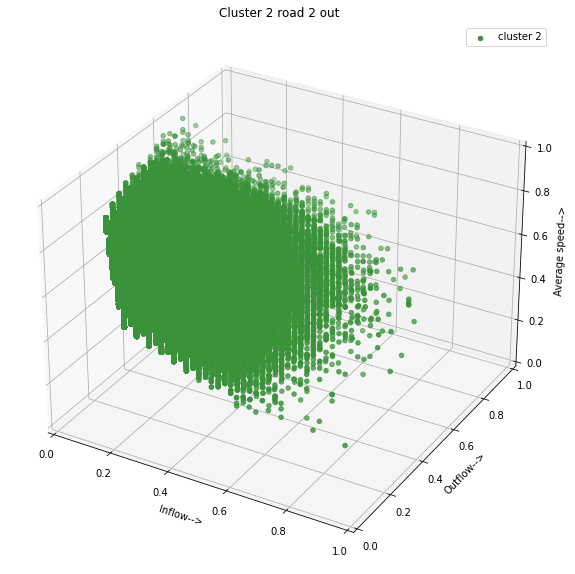

In [15]:
fig3 = plt.figure(figsize = (10,10))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 20 , color = '#3A923A', label = "cluster 2")
ax3.set_xlim3d(0,1)
ax3.set_ylim3d(0,1)
ax3.set_zlim3d(0,1)
ax3.set_xlabel('Inflow-->')
ax3.set_ylabel('Outflow-->')
ax3.set_zlabel('Average speed-->')
ax3.set_title(f"Cluster 2 road {road} {direction}")
ax3.legend()
plt.show()

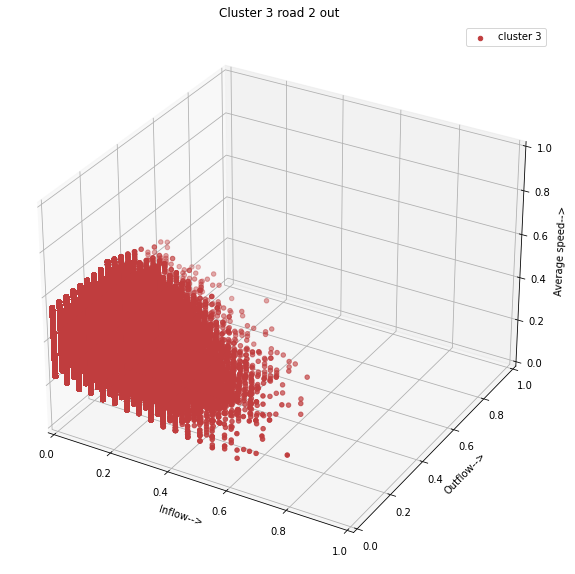

In [16]:
fig4 = plt.figure(figsize = (10,10))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 20 , color = '#C03D3E', label = "cluster 3")
ax4.set_xlim3d(0,1)
ax4.set_ylim3d(0,1)
ax4.set_zlim3d(0,1)
ax4.set_xlabel('Inflow-->')
ax4.set_ylabel('Outflow-->')
ax4.set_zlabel('Average speed-->')
ax4.set_title(f"Cluster 3 road {road} {direction}")
ax4.legend()
plt.show()

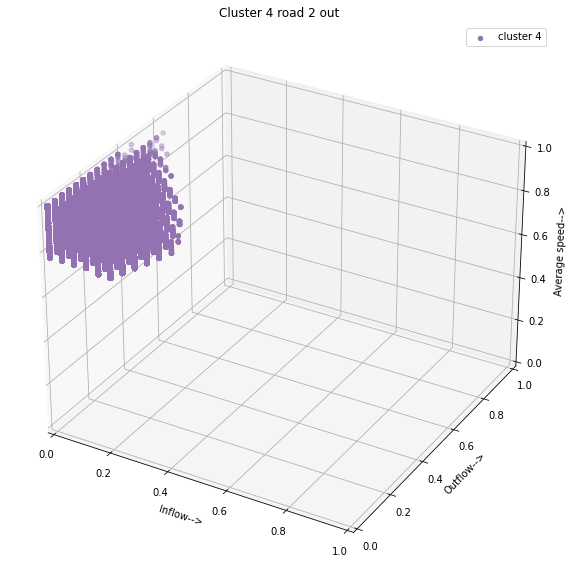

In [17]:
fig5 = plt.figure(figsize = (10,10))
ax5 = fig5.add_subplot(111, projection='3d')
ax5.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 20 , color = '#9372B2', label = "cluster 4")
ax5.set_xlim3d(0,1)
ax5.set_ylim3d(0,1)
ax5.set_zlim3d(0,1)
ax5.set_xlabel('Inflow-->')
ax5.set_ylabel('Outflow-->')
ax5.set_zlabel('Average speed-->')
ax5.set_title(f"Cluster 4 road {road} {direction}")
ax5.legend()
plt.show()

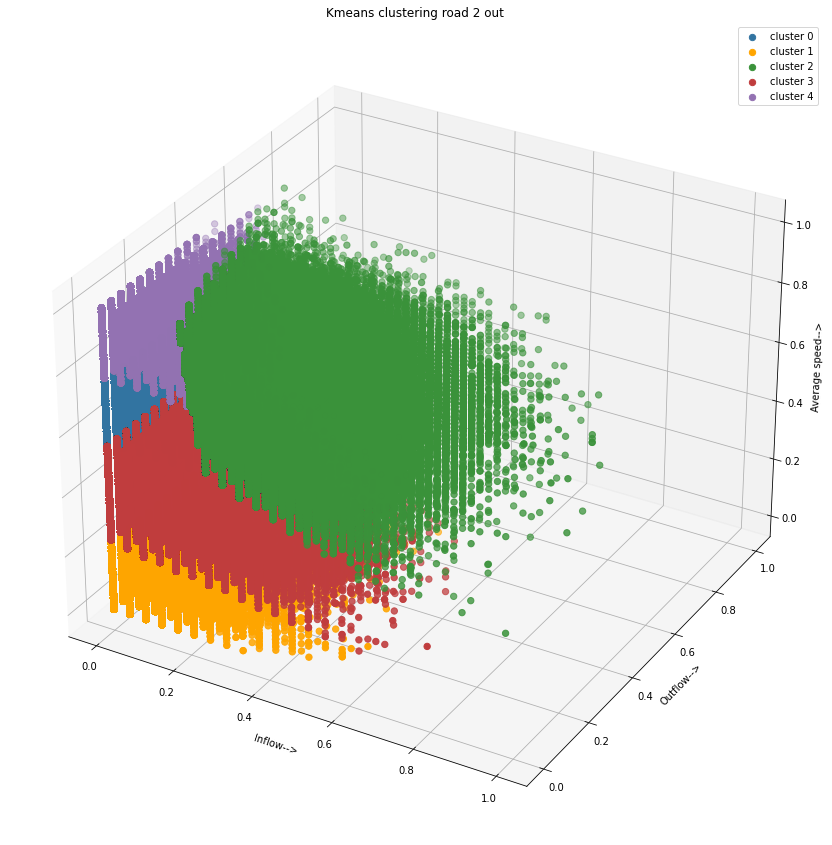

In [18]:
fig6 = plt.figure(figsize = (15,15))
ax6 = fig6.add_subplot(111, projection='3d')
ax6.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = '#3274A1', label = "cluster 0")
ax6.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax6.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = '#3A923A', label = "cluster 2")
ax6.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = '#C03D3E', label = "cluster 3")
ax6.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 40 , color = '#9372B2', label = "cluster 4")
# ax.scatter(X[y_clusters == 5,0],X[y_clusters == 5,1],X[y_clusters == 5,2], s = 40 , color = 'cyan', label = "cluster 5")
# ax.scatter(X[y_clusters == 6,0],X[y_clusters == 6,1],X[y_clusters == 6,2], s = 40 , color = 'yellow', label = "cluster 6")
ax6.set_xlabel('Inflow-->')
ax6.set_ylabel('Outflow-->')
ax6.set_zlabel('Average speed-->')
ax6.set_title(f"Kmeans clustering road {road} {direction}")
ax6.legend()
plt.show()

In [19]:
df.to_csv(f"../dataset/cluster/2020-02-road{road}-{direction}-5cluster.csv",index=False)